In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from twisted.conch.insults.window import horizontalLine

data = pd.read_csv('TLC_New_Driver_Application_Status.csv')

In [26]:
data.head(5)

,App No,Type,App Date,Status,FRU Interview Scheduled,Drug Test,WAV Course,Defensive Driving,Driver Exam,Medical Clearance Form,Other Requirements,Last Updated
0,6078403,HDR,07/16/2024,Incomplete,Not Applicable,Needed,Needed,Needed,Needed,Needed,Fingerprints needed; Copy of DMV license needed,07/17/2024 05:00:01 AM
1,6077989,HDR,07/09/2024,Incomplete,Not Applicable,Needed,Needed,Complete,Needed,Needed,Fingerprints needed; Copy of DMV license needed,07/17/2024 05:00:01 AM
2,6074279,HDR,05/09/2024,Incomplete,Not Applicable,Needed,Needed,Complete,Needed,Needed,Fingerprints needed; Copy of DMV license needed,07/17/2024 05:00:01 AM
3,5735329,HDR,10/17/2016,Incomplete,Not Applicable,Complete,Complete,Complete,Needed,Complete,Copy of DMV license needed,07/17/2024 05:00:01 AM
4,6077157,HDR,06/24/2024,Incomplete,Not Applicable,Complete,Complete,Complete,Needed,Complete,Not Applicable,07/17/2024 05:00:01 AM


In [27]:
data[data["Type"]!="HDR"].head(5)

,App No,Type,App Date,Status,FRU Interview Scheduled,Drug Test,WAV Course,Defensive Driving,Driver Exam,Medical Clearance Form,Other Requirements,Last Updated
200,6072795,PDR,04/19/2024,Incomplete,Not Applicable,Not Applicable,Not Applicable,Needed,Not Applicable,Not Applicable,Copy of DMV license needed,07/17/2024 05:00:01 AM
401,6076906,PDR,06/19/2024,Incomplete,Not Applicable,Not Applicable,Not Applicable,Complete,Not Applicable,Not Applicable,Fingerprints needed,07/17/2024 05:00:01 AM
427,6074613,VDR,05/14/2024,Incomplete,Not Applicable,Not Applicable,Not Applicable,Needed,Not Applicable,Not Applicable,Copy of DMV license needed,07/17/2024 05:00:01 AM
480,6078248,PDR,07/13/2024,Incomplete,Not Applicable,Not Applicable,Not Applicable,Needed,Not Applicable,Not Applicable,Fingerprints needed,07/17/2024 05:00:01 AM
906,6074923,PDR,05/18/2024,Incomplete,Not Applicable,Not Applicable,Not Applicable,Needed,Not Applicable,Not Applicable,Fingerprints needed,07/17/2024 05:00:01 AM


In [28]:
data["App No"].drop_duplicates(inplace=True)


/tmp/ipykernel_50995/2544296374.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Status", data=data, palette="viridis")


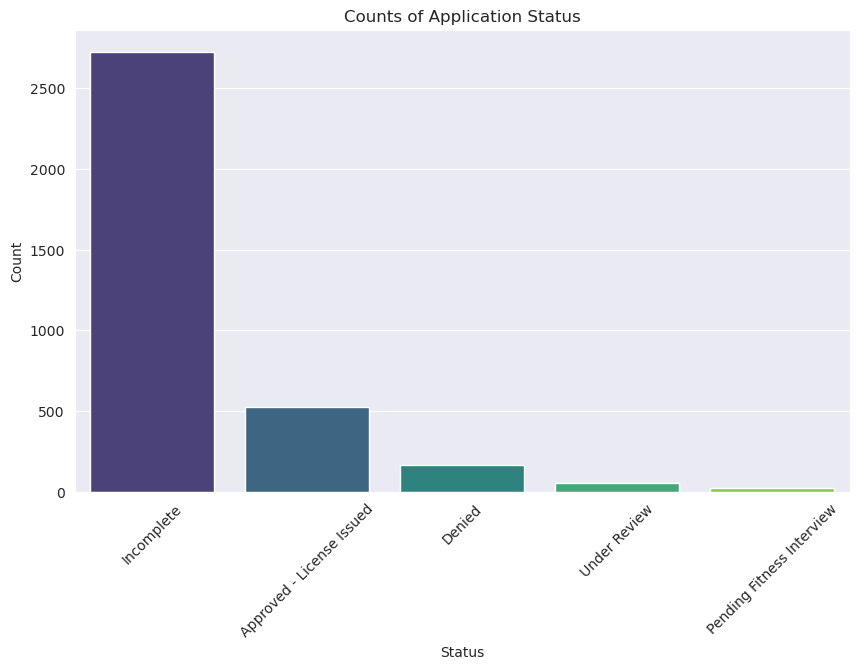

In [37]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x="Status", data=data, palette="viridis")
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Counts of Application Status')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [30]:
data["Status"].value_counts()

Status
Incomplete                   2727
Approved - License Issued     526
Denied                        167
Under Review                   54
Pending Fitness Interview      22
Name: count, dtype: int64

In [40]:
data["App Date"] = pd.to_datetime(data["App Date"])
data["Last Updated"] = pd.to_datetime(data["Last Updated"])

In [46]:
data["Time passed"] = (data["Last Updated"] - data["App Date"]).dt.days

In [50]:
mean_processing_time = data.groupby("Status")["Time passed"].mean()
print(mean_processing_time)

Status
Approved - License Issued     52.771863
Denied                       104.814371
Incomplete                    58.850385
Pending Fitness Interview    108.954545
Under Review                  51.648148
Name: Time passed, dtype: float64


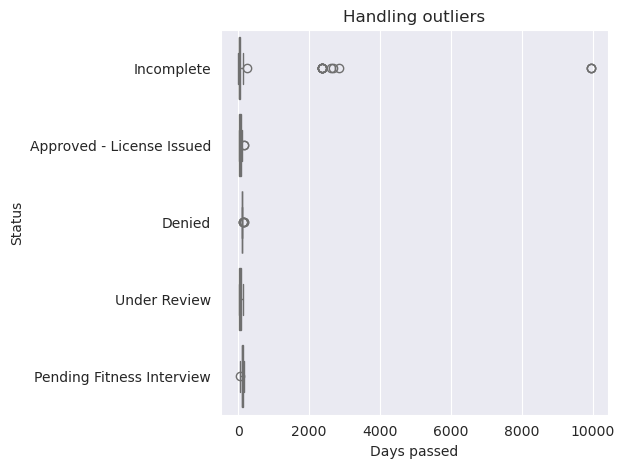

In [62]:
plt.figure(figsize=(5,5))
sns.boxplot(x=data["Time passed"],y=data["Status"],color="skyblue")
plt.title("Handling outliers")
plt.xlabel("Days passed")
plt.show()

In [70]:
std = data.groupby("Status")["Time passed"].std()
mean = data.groupby("Status")["Time passed"].mean()
print("The std is ", std,'\n', "The mean is ", mean)

The std is  Status
Approved - License Issued     24.266246
Denied                         9.541679
Incomplete                   363.039448
Pending Fitness Interview     34.183646
Under Review                  27.704749
Name: Time passed, dtype: float64 
 The mean is  Status
Approved - License Issued     52.771863
Denied                       104.814371
Incomplete                    58.850385
Pending Fitness Interview    108.954545
Under Review                  51.648148
Name: Time passed, dtype: float64


In [99]:
gby = data.groupby("Status")

In [97]:
def cap_outliers(group):
    mean = group["Time passed"].mean()
    std = group["Time passed"].std()
    lower = mean-3*std
    upper = mean+3*std
    group["Time passed"] = np.where(group["Time passed"] > upper, upper,np.where(group["Time passed"]<lower,lower,group["Time passed"]))
    return group

transformed = gby.apply(cap_outliers)
transformed.head()

/tmp/ipykernel_50995/3266712284.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transformed = gby.apply(cap_outliers)


App No Type   App Date  \
Status                                                  
Approved - License Issued 8   6075486  HDR 2024-05-27   
                          12  6077495  HDR 2024-06-29   
                          19  6073939  HDR 2024-05-04   
                          28  6076182  HDR 2024-06-06   
                          32  6076639  HDR 2024-06-14   

                                                 Status  \
Status                                                    
Approved - License Issued 8   Approved - License Issued   
                          12  Approved - License Issued   
                          19  Approved - License Issued   
                          28  Approved - License Issued   
                          32  Approved - License Issued   

                             FRU Interview Scheduled Drug Test WAV Course  \
Status                                                                      
Approved - License Issued 8           Not Applicable  Complete   Complete   
                          12          Not Applicable  Complete   Complete   
                          19          Not Applicable  Complete   Complete   
                          28          Not Applicable  Complete   Complete   
                          32          Not Applicable  Complete   Complete   

                             Defensive Driving Driver Exam  \
Status                                                       
Approved - License Issued 8           Complete    Complete   
                          12          Complete    Complete   
                          19          Complete    Complete   
                          28          Complete    Complete   
                          32          Complete    Complete   

                             Medical Clearance Form Other Requirements  \
Status                                                                   
Approved - License Issued 8                Complete     Not Applicable   
                          12               Complete     Not Applicable   
                          19               Complete     Not Applicable   
                          28               Complete     Not Applicable   
                          32               Complete     Not Applicable   

                                    Last Updated  Time passed  
Status                                                         
Approved - License Issued 8  2024-07-17 05:00:01         51.0  
                          12 2024-07-17 05:00:01         18.0  
                          19 2024-07-17 05:00:01         74.0  
                          28 2024-07-17 05:00:01         41.0  
                          32 2024-07-17 05:00:01         33.0

<Axes: xlabel='Time passed', ylabel='Status'>

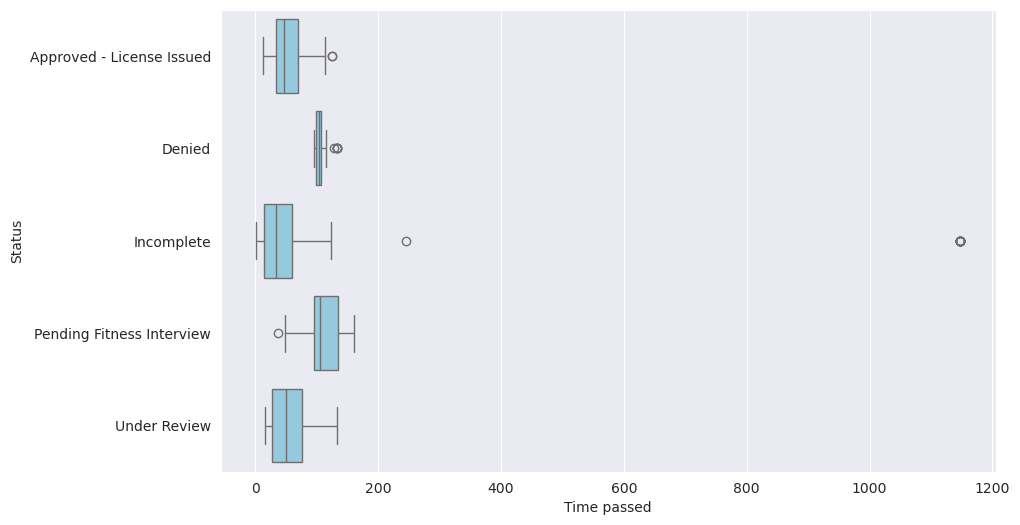

In [98]:
plt.figure(figsize=(10,6))
sns.boxplot(x=transformed["Time passed"],y=transformed["Status"],color="skyblue")

In [103]:
def cap_outliers_iqr(group):
    q1 = group["Time passed"].quantile(0.25)
    q3 = group["Time passed"].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    group["Time passed"] = np.where(group["Time passed"] > upper, upper,
                                    np.where(group["Time passed"] < lower, lower, group["Time passed"]))
    return group

transformed= gby.apply(cap_outliers_iqr)


/tmp/ipykernel_50995/3919263891.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transformed= gby.apply(cap_outliers_iqr)


<Axes: xlabel='Time passed', ylabel='Status'>

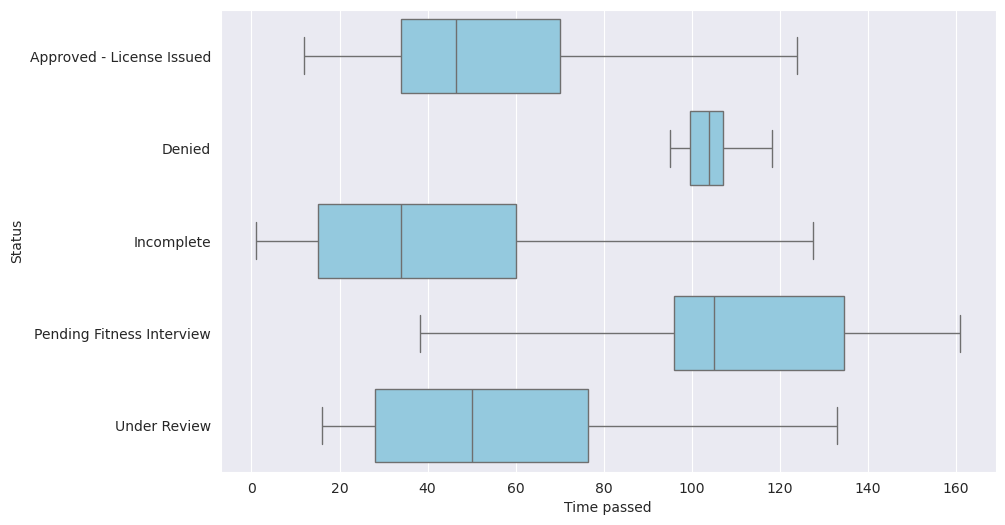

In [104]:
plt.figure(figsize=(10,6))
sns.boxplot(x=transformed["Time passed"],y=transformed["Status"],color="skyblue")